In [40]:
%%capture output
%run spectrogram_gne_functions.ipynb

In [16]:
# Define  parameters
e0_inj = np.arange(0.01, 1.0, 0.01)
m = 2
fftlen=1
nMax=15
returnAll = False 

In [17]:
# File to write data to: 
datafile = open('CurveFittingNoiselessTake2.txt','w')
datafile.write('\t\t'.join(('Injected Ecc.', 'Recovered Ecc.')))

for e0 in e0_inj: 
    e_fit = bestFitEccMaggiore(e0, m, m, fftlen, nMax, returnAll)
    datafile.write('{}\t\t{}'.format(e0, e_fit))
    print '{}\t\t{}'.format(e0, e_fit)
    
datafile.close()

0.01		0.0110606322869
0.02		0.0220225991093
0.03		0.033036207641
0.04		0.0440547050973
0.05		0.0550788460804
0.06		0.0661100164117
0.07		0.0771497012447
0.08		0.0881988526431
0.09		0.0992593135101
0.1		0.110332062061
0.11		0.121418586073
0.12		0.132520088715
0.13		0.1436377528
0.14		0.154772777929
0.15		0.165926253172
0.16		0.17709926483
0.17		0.188292782499
0.18		0.199507727264
0.19		0.210744939724
0.2		0.222005186164
0.21		0.233289160895
0.22		0.244597484975
0.23		0.255930720375
0.24		0.267289378201
0.25		0.278673934586
0.26		0.290084848743
0.27		0.301522587071
0.28		0.312987645912
0.29		0.32448057343
0.3		0.336002010398
0.31		0.347552708279
0.32		0.359133553979
0.33		0.370745613809
0.34		0.382390144488
0.35		0.394068628299
0.36		0.405782798558
0.37		0.417534668027
0.38		0.429326560369
0.39		0.44116112369
0.4		0.453041428219
0.41		0.464970955498
0.42		0.476953698903
0.43		0.48899424632
0.44		0.501097894826
0.45		0.513270809198
0.46		0.525520235374
0.47		0.53785486144
0.48		0.55028518

ValueError: stride cannot be greater than the duration of this TimeSeries

In [41]:
# File to write data to: 
datafile = open('CurveFittingNoiselessTake2.txt','w')
datafile.write('\t\t'.join(('Injected Ecc.', 'Recovered Ecc.')))

for e0 in e0_inj: 
    e_fit = bestFitEccMaggiore(e0, m, m, fftlen, nMax, returnAll)
    datafile.write('{}\t\t{}'.format(e0, e_fit))
    print '{}\t\t{}'.format(e0, e_fit)
    
datafile.close()

0.01		0.0110106923224
0.02		0.0220219549428
0.03		0.0330361989888


KeyboardInterrupt: 

In [ ]:
# Load data
e_inj, e_rec = np.loadtxt('CurveFittingNoiselessTake2.txt',skiprows=1,usecols=(0,1),unpack=True)

In [ ]:
# Plotting
diag = np.arange(0,1, 0.1)
plt.figure(figsize=(12,10))
plt.plot(diag, diag, color='k')
plt.scatter(e_inj, e_rec, s=30)
plt.title(r"Injected vs. Recovered $e_0$", fontsize=18)
plt.text(0.45, 0.03, r"$m_1$ = $m_2$ = {} $M_\odot$, FFT length = {} s, nMax = {}".format(2,1,15),fontsize=16)
plt.xlabel(r"Injected $e_0$", fontsize=16)
plt.ylabel(r"Recovered $e_0$", fontsize=16)
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.grid(alpha=0.5)

In [29]:
# Getting experimental power dist for diff ecc to use to plot in mathematica 
e_plot = [1e-10, 0.1, 0.2, 0.3, 0.5, 0.7]

for e in e_plot: 
    print "Injected ecc: {}".format(e)
    g, n = genPowerDistFromSpec(e, m, m, 0, fftlen, nMax)
    print g
    print " "

Injected ecc: 1e-10
[  2.26974833e-08   1.00000000e+00   5.29662564e-08
   3.93681918e-10   2.97293299e-11   5.01711694e-12
   1.28994420e-12   4.30541983e-13   1.71656761e-13
   7.78424775e-14   3.89099834e-14   2.09873393e-14
   1.20326980e-14   7.25241127e-15   4.55723479e-15]
 
Injected ecc: 0.1
[  9.76299231e-03   1.00000000e+00   6.15672777e-02
   2.24691089e-03   6.69640685e-05   1.79210928e-06
   4.48639357e-08   1.07632171e-09   2.56412981e-11
   8.36097902e-13   1.24839437e-13   6.15874741e-14
   3.38540848e-14   1.97357566e-14   1.20921297e-14]
 
Injected ecc: 0.2
[  4.62251730e-02   1.00000000e+00   2.52349095e-01
   3.67698357e-02   4.34638321e-03   4.60084267e-04
   4.54875992e-05   4.29662100e-06   3.91401049e-07
   3.39734587e-08   2.70108030e-09   1.88648490e-10
   1.11389046e-11   5.45721589e-13   7.61241754e-14]
 
Injected ecc: 0.3
[  1.42038227e-01   1.00000000e+00   5.99515498e-01
   1.96620509e-01   5.16336165e-02   1.20789580e-02
   2.63219008e-03   5.47018008e-0

In [46]:
test_spec = genSpectrogram(0.7, m, m, 0, fftlen)

In [47]:
power_bin1 = test_spec[0]
freqs = test_spec.frequencies.value

(0, 100)

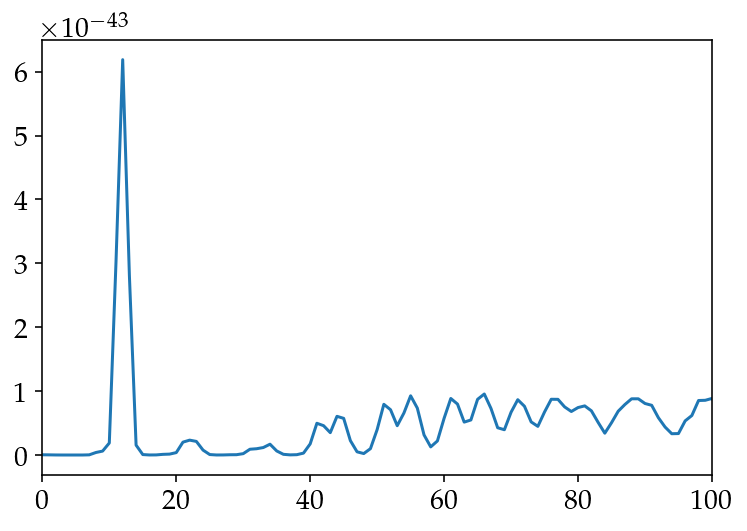

In [48]:
plt.plot(freqs, power_bin1)
plt.xlim(0,100)